In [1]:
#ASTR231
#extra credit - using gaia to investigate the SMC
#garcia, gil
#created: 05/09/2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
#setting the plot size
from pylab import rcParams
rcParams['figure.figsize'] = 6,6

In [2]:
#importing our gaia data created by querying the gaia database
df = pd.read_csv('smc_8deg_rv_teff-result.csv')

In [3]:
df.head()

,designation,l,b,ra,dec,radial_velocity,teff_val,pmra,pmdec,parallax,parallax_error,bp_rp,bp_g,phot_g_mean_mag
0,Gaia DR2 4690579448058829824,301.725016,-45.356628,15.567856,-71.746226,NaN,NaN,0.928589,-1.309050,0.024668,0.269917,1.121937,0.419474,19.000437
1,Gaia DR2 4690582299967070976,301.520402,-45.485657,15.997198,-71.608179,NaN,NaN,-0.665480,-0.683414,0.015534,0.501859,NaN,NaN,19.903250
2,Gaia DR2 4690582025041498624,301.523187,-45.464608,15.995656,-71.629314,NaN,NaN,0.683282,-0.374866,0.027474,0.386261,0.069706,-0.230167,19.592530
3,Gaia DR2 4690585327883555840,301.548667,-45.497880,15.931902,-71.597348,NaN,7030.3335,0.708322,-1.338788,0.025716,0.039668,0.562186,0.202310,15.986249
4,Gaia DR2 4690574916876040576,302.137511,-45.267499,14.654525,-71.849674,NaN,NaN,-0.156052,-1.010838,0.022043,0.184090,1.121376,0.288881,18.624624


In [54]:
#finding distance using parallax values
distance = 1/(df['parallax']/1000.)
df['distance'] = distance

In [4]:
df['teff_val'].notnull().sum()

10138

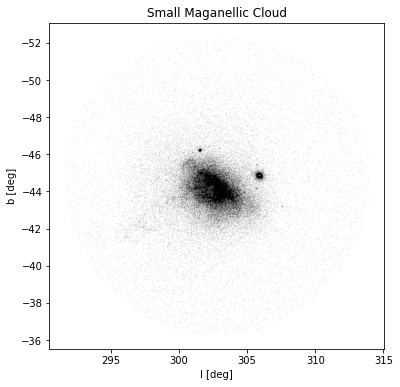

In [87]:
#plotting the SMC
x = df['l']
y = df['b']
plt.scatter(x,y,s = 0.1,alpha = 0.05,color='k')
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('Small Maganellic Cloud')
plt.ylabel('b [deg]')
plt.xlabel('l [deg]')
plt.savefig('smc_structure.png')
plt.show()

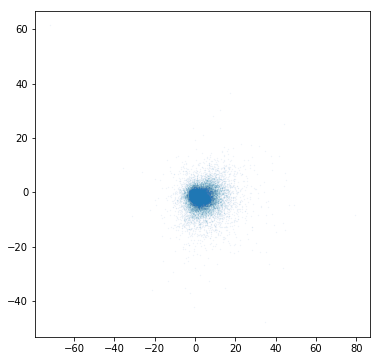

In [9]:
pmra = df['pmra']
pmdec = df['pmdec']
plt.scatter(pmra,pmdec,s=0.1,alpha = 0.1)

In [10]:
temp_constraint = df['teff_val'].notnull()
df_temp = pd.DataFrame(df[temp_constraint])

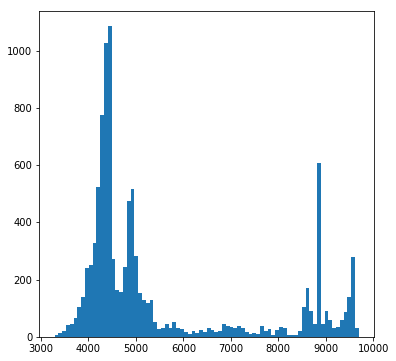

In [88]:
#quick look at the temp distribution
plt.hist(df_temp['teff_val'],bins=80)
plt.show()

In [91]:
rcParams['figure.figsize'] = 8,6

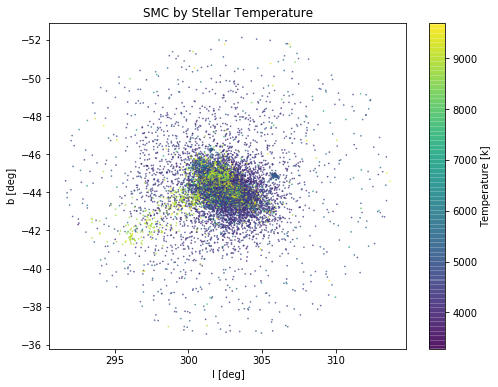

In [92]:
#adding a temp gradient
x = df_temp['l']
y = df_temp['b']
plt.scatter(x,y,s = 0.5,alpha = 0.7,c=df_temp['teff_val'])
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('Temperature [k]')
plt.title('SMC by Stellar Temperature')
plt.xlabel('l [deg]')
plt.ylabel('b [deg]')
plt.savefig('smc_temp.png')
plt.show()

In [23]:
high_temp = df_temp['teff_val'] > 6000
df_high_temp = pd.DataFrame(df_temp[high_temp])

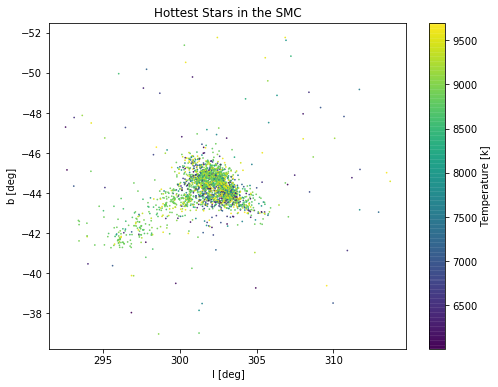

In [93]:
x1 = df_high_temp['l']
y1 = df_high_temp['b']
plt.scatter(x1,y1,s = 0.5,alpha = 0.9,c=df_high_temp['teff_val'])
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('Temperature [k]')
plt.title('Hottest Stars in the SMC')
plt.xlabel( 'l [deg]')
plt.ylabel('b [deg]')
plt.savefig('smc_hot_stars.png')
plt.show()

In [27]:
rv_constraint = df['radial_velocity'].notnull()
df_rv = pd.DataFrame(df[rv_constraint])

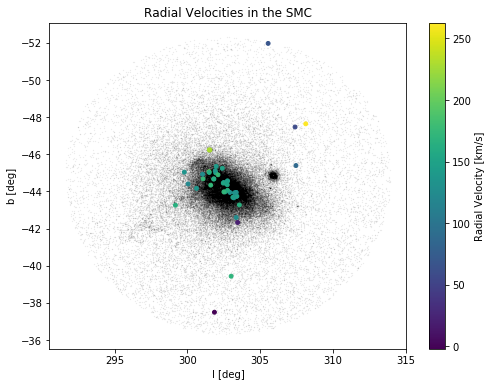

In [94]:
#overlaying RV values
x1 = df_rv['l']
y1 = df_rv['b']
plt.scatter(df['l'],df['b'],color='k',s=0.1,alpha=0.1)
plt.scatter(x1,y1,c=df_rv['radial_velocity'],s=15)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
cb = plt.colorbar()
cb.set_label('Radial Velocity [km/s]')
plt.title('Radial Velocities in the SMC')
plt.xlabel( 'l [deg]')
plt.ylabel('b [deg]')
plt.savefig('smc_rv.png')
plt.show()

In [42]:
df_rv['radial_velocity'].mean()

144.84531031066936

In [60]:
df['distance'].mean()

55068.026977020025

In [45]:
df.head()

,designation,l,b,ra,dec,radial_velocity,teff_val,pmra,pmdec,parallax,parallax_error,bp_rp,bp_g,phot_g_mean_mag
0,Gaia DR2 4690579448058829824,301.725016,-45.356628,15.567856,-71.746226,NaN,NaN,0.928589,-1.309050,0.024668,0.269917,1.121937,0.419474,19.000437
1,Gaia DR2 4690582299967070976,301.520402,-45.485657,15.997198,-71.608179,NaN,NaN,-0.665480,-0.683414,0.015534,0.501859,NaN,NaN,19.903250
2,Gaia DR2 4690582025041498624,301.523187,-45.464608,15.995656,-71.629314,NaN,NaN,0.683282,-0.374866,0.027474,0.386261,0.069706,-0.230167,19.592530
3,Gaia DR2 4690585327883555840,301.548667,-45.497880,15.931902,-71.597348,NaN,7030.3335,0.708322,-1.338788,0.025716,0.039668,0.562186,0.202310,15.986249
4,Gaia DR2 4690574916876040576,302.137511,-45.267499,14.654525,-71.849674,NaN,NaN,-0.156052,-1.010838,0.022043,0.184090,1.121376,0.288881,18.624624


In [56]:
#creating a CM plot of the SMC
color_constraint = df['bp_rp'].notnull()
df_color = pd.DataFrame(df[color_constraint])

In [57]:
def distane_modulus(apparant_m,distance):
    term2 = 5*(np.log10(distance)-1)
    return (apparant_m - term2)

In [58]:
abs_g_mags = distane_modulus(df_color['phot_g_mean_mag'],df_color['distance'])

In [83]:
rcParams['figure.figsize'] = 8,9

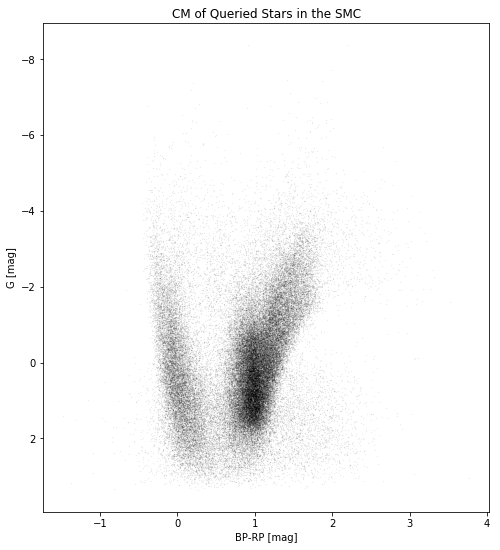

In [84]:
plt.scatter(df_color['bp_rp'],abs_g_mags,alpha=0.1,s=0.1,color='k')
plt.gca().invert_yaxis()
plt.title('CM of Queried Stars in the SMC')
plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')
plt.show()